#Let's Grow More(LGMVIP) - "DATA SCIENCE INTERN"

#LGMVIP OCTOBER 2023

---

#AUTHOR - MITHIES P

---

#BEGINNER LEVEL TASK

#TASK 1 - IRIS FLOWER CLASSIFICATION

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Dataset**

In [5]:
data = pd.read_csv(r"C:\Users\student\Downloads\iris.csv")
data.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Description**

In [6]:
data.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Checking Null Values**

In [7]:
data.isnull().sum()

sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
class                 0
dtype: int64

**BarPlot**

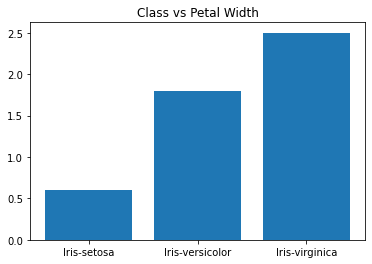

In [8]:
plt.bar(data['class'],data['petal width in cm'])
plt.title("Class vs Petal Width")
plt.show()

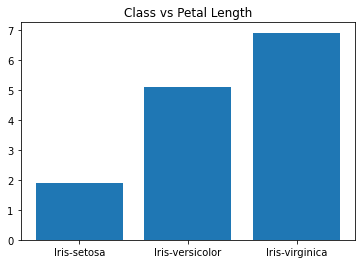

In [9]:
plt.bar(data['class'],data['petal length in cm'])
plt.title("Class vs Petal Length")
plt.show()

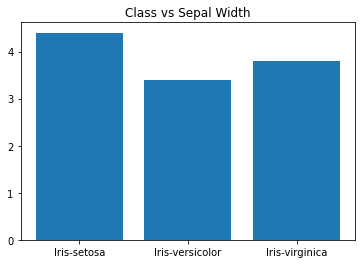

In [10]:
plt.bar(data['class'],data['sepal width in cm'])
plt.title("Class vs Sepal Width")
plt.show()

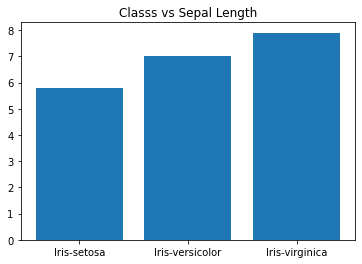

In [11]:
plt.bar(data["class"],data["sepal length in cm"])
plt.title("Classs vs Sepal Length")
plt.show()

**Heat Map (Correlation)**

<AxesSubplot:>

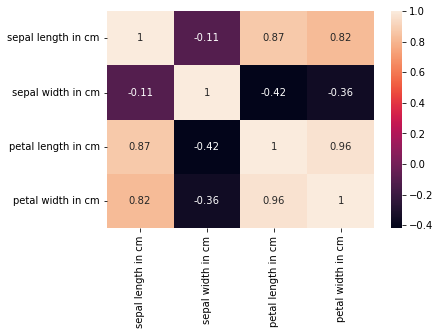

In [12]:
sns.heatmap(data.corr(),annot=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**PreProcessing - Label Encoder**

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])
data.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Checking Unique Values in the Target Variable**

In [15]:
data['class'].unique()

array([0, 1, 2])

**Spliting X and Y**

In [16]:
X = data.iloc[:,:-1]
y = data['class']

**Spliting Train and Test**

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

**Random Forest Classifier(Mode Creartion)**

In [18]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc.fit(X_train, y_train)

RandomForestClassifier()

**Predictions**

In [19]:
y_test_pred = rc.predict(X_test)
y_train_pred = rc.predict(X_train)

**Evaluating the Model**

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
test_accuracy = accuracy_score(y_test,y_test_pred)
train_accuracy = accuracy_score(y_train,y_train_pred)

print("Training Accuracy : {}".format(test_accuracy))
print("Test Accuracy : {}".format(train_accuracy))

Training Accuracy : 0.9666666666666667
Test Accuracy : 1.0


In [21]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



**Classify the New Values**

In [22]:
rc.predict([[5.1, 3.5, 1.4, 0.2]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])